In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
import random

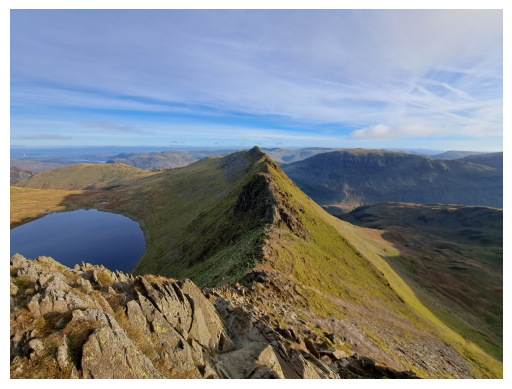

In [2]:
def import_image(filename):
    img = cv2.imread(filename) 
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
    return img 
img = import_image("helvellyn.jpg") 
plt.axis("off") 
plt.imshow(img)

240000 total pixels,only 4800.0 are shown


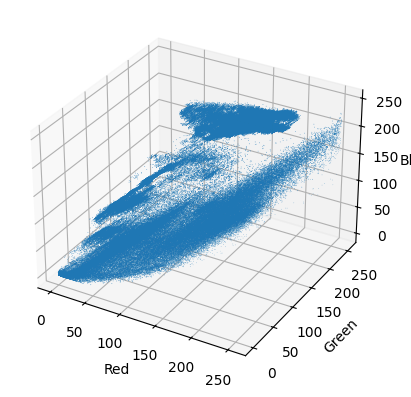

In [3]:
img = import_image("helvellyn.jpg") 
r,g,b = cv2.split(img) 
r = r.flatten()[1::50] 
g = g.flatten()[1::50] 
b = b.flatten()[1::50] 
print(f"{len(r)} total pixels,only {len(r) / 50} are shown" ) 
fig = plt.figure() 
ax = fig.add_subplot(projection="3d") 
ax.scatter(r,g,b,s=0.3,linewidths=0) 
ax.set_xlabel("Red") 
ax.set_ylabel("Green") 
ax.set_zlabel("Blue") 
plt.savefig("pixels_in_3d_space.png",format="png",dpi=600)

dimensions: (267, 400, 3)


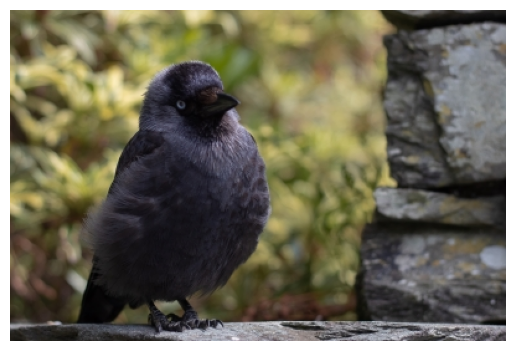

In [4]:
img = import_image("bird-small.jpg")
plt.axis('off')
plt.imshow(img);

print(f"dimensions: {img.shape}")

# split into channels
r, g, b = cv2.split(img)

# reformat pixel colours into 1xn array
r = np.array(r.flatten())
g = np.array(g.flatten())
b = np.array(b.flatten())

In [5]:
def dist(a,b):
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2 + (a[2] - b[2]) ** 2) 
k = 4 
centroids = np.array([ [random.randint(0, 255),
                        random.randint(0, 255),
                        random.randint(0, 255)] for i in range(k)])

# number of pixels in the image
pixels = len(r)

max_iter = 8 
moved = True 

iter = 0 
while moved and iter <= max_iter:
    iter += 1 
    assignment = [0] * pixels 
    for i in range(pixels):
        distances = [0] * k 
        for j in range(k):
            distances[j] = dist(centroids[j],[r[i],g[i],b[i]]) 
        nearest = np.argmin(distances) 
        assignment[i] = nearest 
    prev_centroids = centroids.copy() 
    for i in range(k):
        ind = [j for j in range(pixels) if assignment[j] == i] 
        if len(ind) != 0:
            centroids[i][0] = np.mean(r[ind])
            centroids[i][1] = np.mean(g[ind])
            centroids[i][2] = np.mean(b[ind])
        else: 
            centroids[i][0] = 0
            centroids[i][1] = 0
            centroids[i][2] = 0
    
    # check if centroids have moved
    if np.array_equal(centroids, prev_centroids):
        moved = False

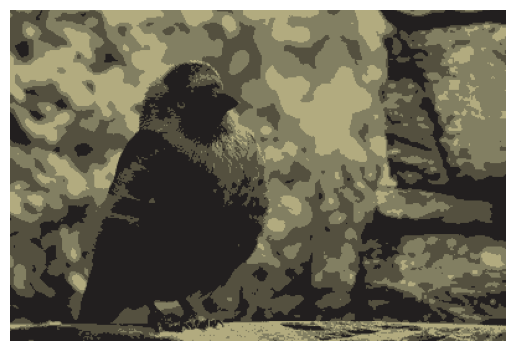

In [6]:
r_copy = np.array(r.copy())
g_copy = np.array(g.copy())
b_copy = np.array(b.copy())

# update pixels to be the colour of their cluster
for i in range(k):
    ind = [j for j in range(pixels) if assignment[j] == i ]

    r_copy[ind] = centroids[i][0]
    g_copy[ind] = centroids[i][1]
    b_copy[ind] = centroids[i][2]

# compile channels
img2 = np.array([r_copy, g_copy, b_copy])

# transpose to group values into pixels
img2 = img2.transpose()

# reshape list of pixels into height x widgh x channels
img2 = img2.reshape(img.shape)

plt.axis('off')
plt.imshow(img2)

plt.savefig("bird-small(k4).png", format="png", dpi=600)

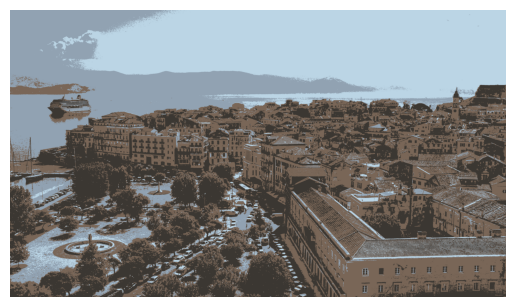

In [7]:
# ESTIMATED RUN TIME - depends on size of image - if using images supplied with this notebook, around 30-45 seconds depending 
# on value of k chosen. Higher values take longer to run.

img = import_image("corfu.jpg")

# split image into channels, reformat h x w x c structure 
img = np.array(cv2.split(img))
img = img.transpose(1, 2, 0)

# exit conditions
max_iter = 10
moved = True

# number of clusters
k = 4

# initial cluster centres
clusters = [[random.randint(0, 255) for i in range(3)] for j in range(k) ]

# define distance function
def euclidean_distance(a, b):
    return (np.sqrt(np.sum( (b-a)**2, 2)))

# main

iter = 0
while iter <= max_iter and moved == True:
    iter += 1

    # calculate distance between pixels and cluster, for every cluster
    distances = [euclidean_distance(img, clusters[i]) for i in range(k)]        

    # index (0, ..., k) of the nearest cluster centre for each pixel
    # produces an array the same shape as the image, instead of pixels,
    # it stores in the index of the nearest cluster
    # this can be used as a mask later on
    nearest = np.argmin(distances, 0) 

    prev_clusters = clusters.copy()
    
    for i in range(k):
        
        # create 1-hot encoded mask of which pixels belong to the cluster
        ind = np.array( np.where(nearest == i, 1, 0), dtype = bool) 

        # apply mask to image to extract subset of pixels 
        subset = img[ind] 

         # calculate mean of the identified subset - update cluster centres
        clusters[i] = [np.round(np.mean(subset[:,0])), np.round(np.mean(subset[:,1])), np.round(np.mean(subset[:,2]))]

        # remove NaN values - replace with 0
        if np.isnan(clusters[i][0]):
            clusters[i][0] = 0
        if np.isnan(clusters[i][1]):
            clusters[i][1] = 0
        if np.isnan(clusters[i][2]):
            clusters[i][2] = 0

    if clusters == prev_clusters:
        moved = False
    

# after the final iteration, the cluster centres represent the pixel colour of each cluster
# we apply the final version of the array, nearest, as a mask to sample colours for each pixel

clusters = np.array(clusters, dtype = int)
img2 = clusters[nearest]

# display image
plt.axis('off')
plt.imshow(img2)

plt.savefig("corfu(k4).png", format="png", dpi=600)


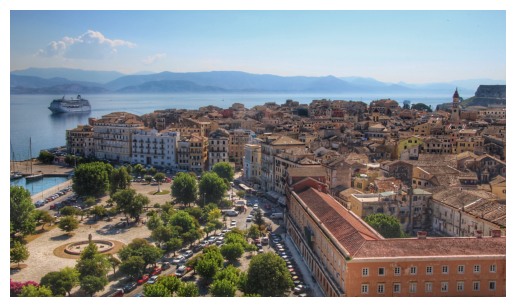

In [8]:
plt.axis('off')
plt.imshow(img);